# XG325: Explainable Artificial Intelligence
    
## Neural Networks (Classification)

**Week 08 | Lecture 04**

_Saturday, April 26, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics
import sklearn.inspection

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Regression

In [2]:
# Load dataset
x1 = numpy.random.random(size=1001)
x2 = 0.5*numpy.random.random(size=1001)
x3 = 0.5*numpy.random.random(size=1001)
xx = pandas.DataFrame.from_dict({'x1': x1, 'x2': x2, 'x3': x3})

y = (x1 + numpy.random.normal(0, 0.2, size=(1001,)) > 0.6).astype('int')

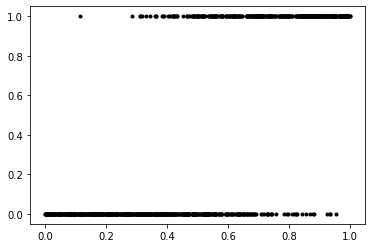

In [3]:
# Plot
plt.plot(x1, y, 'k.'); plt.show()

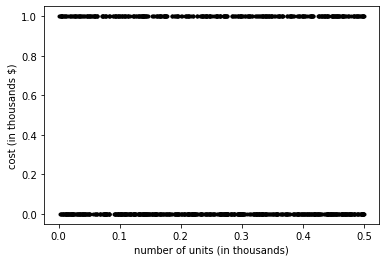

In [4]:
# Plot
plt.plot(x2, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## Simple Neural Network

In [5]:
train_x, val_x, train_y, val_y = sklearn.model_selection.train_test_split(xx, y, test_size=0.7)

In [6]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(3,)),
    tensorflow.keras.layers.Dense(32, activation='relu'),
    tensorflow.keras.layers.Dense(64, activation='relu'),
    tensorflow.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3)                 0         
                                                                 
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""Train"""
log = model.fit(train_x, train_y, epochs=30, validation_data=(val_x,  val_y))

Epoch 1/30
10/10 [==============================] - 2s 28ms/step - loss: 0.6883 - accuracy: 0.5933 - val_loss: 0.6749 - val_accuracy: 0.6163
Epoch 2/30
10/10 [==============================] - 0s 13ms/step - loss: 0.6691 - accuracy: 0.5933 - val_loss: 0.6573 - val_accuracy: 0.6177
Epoch 3/30
10/10 [==============================] - 0s 13ms/step - loss: 0.6517 - accuracy: 0.6200 - val_loss: 0.6384 - val_accuracy: 0.7118
Epoch 4/30
10/10 [==============================] - 0s 13ms/step - loss: 0.6309 - accuracy: 0.7467 - val_loss: 0.6155 - val_accuracy: 0.7932
Epoch 5/30
10/10 [==============================] - 0s 13ms/step - loss: 0.6051 - accuracy: 0.7867 - val_loss: 0.5883 - val_accuracy: 0.8088
Epoch 6/30
10/10 [==============================] - 0s 13ms/step - loss: 0.5756 - accuracy: 0.8067 - val_loss: 0.5571 - val_accuracy: 0.8117
Epoch 7/30
10/10 [==============================] - 0s 13ms/step - loss: 0.5436 - accuracy: 0.8100 - val_loss: 0.5259 - val_accuracy: 0.8146
Epoch 8/30
10

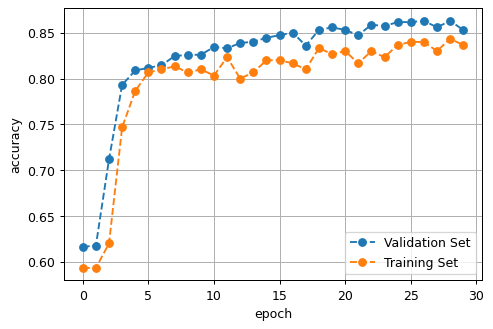

In [8]:
plt.figure(dpi=90)
plt.plot(log.history['val_accuracy'], 'o--', label='Validation Set')
plt.plot(numpy.array(log.history['accuracy']), 'o--', label='Training Set')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()

plt.legend()
plt.show()

In [9]:
"""Evaluate"""
model.evaluate(val_x,  val_y, verbose=2)

22/22 - 0s - loss: 0.3344 - accuracy: 0.8531 - 77ms/epoch - 4ms/step


[0.33441299200057983, 0.8530670404434204]

In [10]:
sklearn.metrics.confusion_matrix(val_y, model.predict(val_x) > 0.1)

array([[259, 173],
       [  7, 262]])

In [11]:
sklearn.metrics.accuracy_score(val_y, model.predict(val_x) > 0.5) 

0.8530670470756063

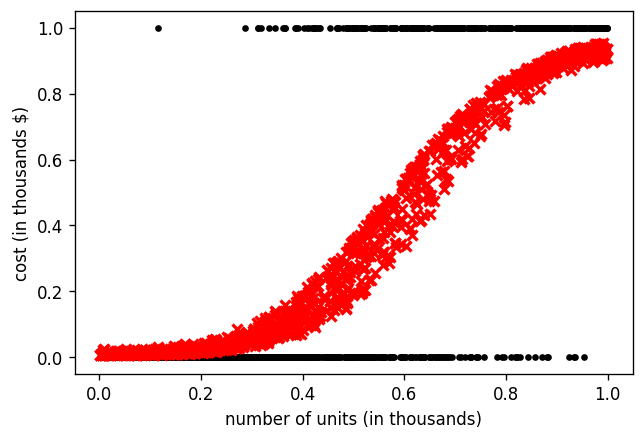

In [12]:
# Plot
plt.figure(dpi=120)
plt.plot(x1, y, 'k.')
plt.plot(x1, model.predict(xx), 'rx', markeredgewidth=2)
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()